# Question 1

## a)
To obtain the samples based on these matrices, we can use Matplotlib's mlab functions. First, we need to import the required libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplab
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd

# plt.style.use('fivethirtyeight')
sns.set_style("darkgrid")
# sns.set_palette("bright")
sns.set_context("talk")
# plt.style.use('dark_background')
# mplab.rcParams['figure.figsize'] = [20.0, 10.0]

### Using Cholesky Decomposition

Afterwards, Numpy's standard_normal and Cholesky functions can be used to create a normal distribution and then transform it according to the A matrix and the B matrix covariance.

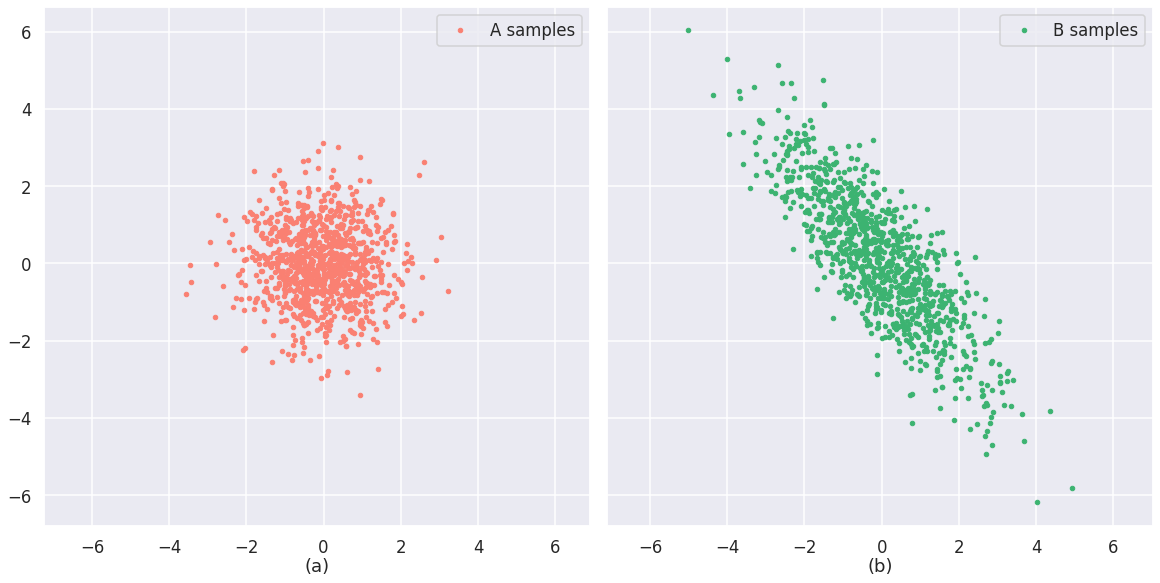

In [ ]:
# First approach for the datapoints, based on: https://stackoverflow.com/questions/14920272/generate-a-data-set-consisting-of-n-100-2-dimensional-samples
mean = (0, 0)
covA = [[1, 0], [0, 1]]

# Select the numebr of samples
sample_number = 1000

# Create the uncorrelated datapoints
uncorr_datapoints = np.random.standard_normal((2, sample_number))

# Modify the datapoints to make them correlated
L = np.linalg.cholesky(covA)
A_matrix_samples = np.dot(L, uncorr_datapoints) + np.array(mean).reshape(2, 1)

# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True,
                       constrained_layout = True, figsize = [16.0, 8.0],
                       subplot_kw = {'aspect': 'equal'})
ax[0].plot(A_matrix_samples[0], A_matrix_samples[1], '.', color = 'salmon',
           label = "A samples")
ax[0].axis('equal')
ax[0].legend()
ax[0].set_title('(a)', y = -0.1)

# Creation of the B matrix
covB = [[2, -2], [-2, 3]]

# Create the uncorrelated datapoints
uncorr_datapoints = np.random.standard_normal((2, sample_number))

# Modify the datapoints to make them correlated
L = np.linalg.cholesky(covB)
B_matrix_samples = np.dot(L, uncorr_datapoints) + np.array(mean).reshape(2, 1)

# Plot the results
ax[1].plot(B_matrix_samples[0], B_matrix_samples[1], '.', color = 'mediumseagreen',
           label = "B samples")
ax[1].axis('equal')
ax[1].legend()
ax[1].set_title('(b)', y = -0.1)
plt.show()

### Using Numpy's random.multivariate

Another technique is to use Numpy's random.multivariate function directly, as such:

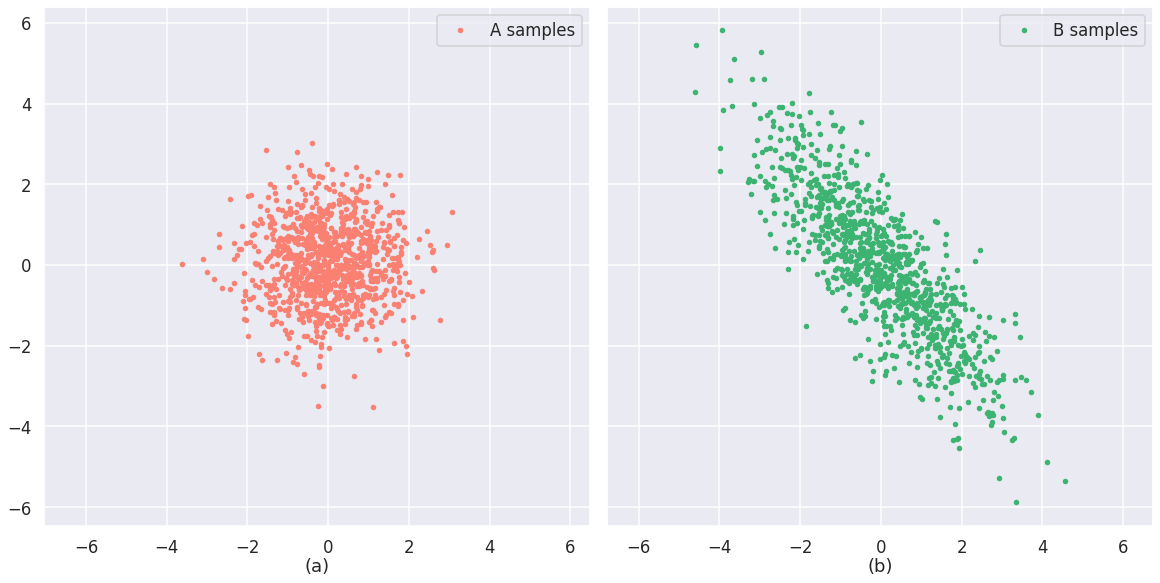

In [ ]:
# Based on https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html
mean = (0, 0)
covA = [[1, 0], [0, 1]]
# Create the A matrix samples
A_matrix_samples = np.random.multivariate_normal(mean, covA, 1000).T
covB = [[2, -2], [-2, 3]]
# Create the B matrix samples
B_matrix_samples = np.random.multivariate_normal(mean, covB, 1000).T

# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True,
                       constrained_layout = True, figsize = [16.0, 8.0],
                       subplot_kw = {'aspect': 'equal'})
ax[0].plot(A_matrix_samples[0], A_matrix_samples[1], '.', color = 'salmon',
           label = "A samples")
ax[0].axis('equal')
ax[0].legend()
ax[0].set_title('(a)', y = -0.1)

ax[1].plot(B_matrix_samples[0], B_matrix_samples[1], '.', color = 'mediumseagreen',
           label = "B samples")
ax[1].axis('equal')
ax[1].legend()
ax[1].set_title('(b)', y = -0.1)
plt.show()

## b)

### Without Whitening
First, it is considered pertinent to create a helper function that allows for an easier calculation of the covariance matrix of the samples:

In [ ]:
# Based on https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/
def obtainCovariance(mat):
  ## Returns the covariance of an input matrix. The function expects a matrix
  ## in the form of features in the rows and samples in the columns
    mean = np.mean(mat, axis = 1) # Assume each row of the matrix is a feature
    sample_size = mat.shape[1] # Obtain the sample size
    mat = (mat.T - mean).T # Substract the mean from the matrix
    covariance_matrix = (mat @ mat.T) / (sample_size - 1) # Sample mean instead of real mean
    return covariance_matrix

With this, it is possible to calculate the contour ellipse for the samples:

In [ ]:
from numpy import linalg as LA #Import numpy's linear algebra functions
from matplotlib.patches import Ellipse
def createEllipse(sampleMat = None, meanMat = None, covMat = None, std = 1,
                  facecolor = "none", edgecolor = "lightgreen", lw = 2):
  
  if meanMat is None:
    meanMat = np.mean(sampleMat, axis = 1)
  if covMat is None:
    covMat = obtainCovariance(sampleMat)
  
  eigenVals, eigenVecs = LA.eigh(covMat)
  ell_width = 2 * std * np.sqrt(eigenVals[1])
  ell_height = 2 * std * np.sqrt(eigenVals[0])
  ell_angle = np.arctan2(eigenVecs[1][1],eigenVecs[0][1])*180/np.pi
  ellipse = Ellipse(xy = (meanMat[0], meanMat[1]), width = ell_width,
                    height = ell_height, angle = ell_angle,
                    facecolor = facecolor, edgecolor = edgecolor, lw = lw,
                    zorder = 5)
  return ellipse

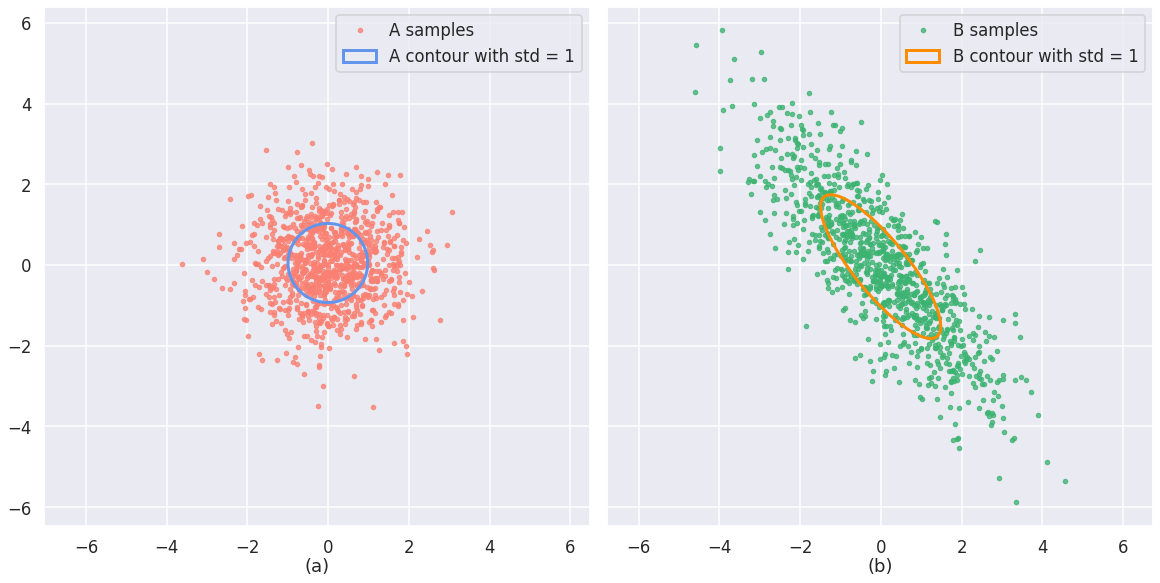

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       constrained_layout = True, figsize = [16.0, 8.0],
                       subplot_kw = {'aspect': 'equal'})
ax[0].plot(A_matrix_samples[0], A_matrix_samples[1], '.', color = 'salmon',
           alpha = 0.8, label = "A samples")
ax[0].axis('equal')
ellipse = createEllipse(A_matrix_samples)
ax[0].add_patch(ellipse)
ellipse.set(clip_box=ax[0].bbox, edgecolor = "cornflowerblue", lw = 3,
          label = "A contour with std = 1")
ax[0].legend()
ax[0].set_title('(a)', y = -0.1)

ax[1].plot(B_matrix_samples[0], B_matrix_samples[1], '.', color = 'mediumseagreen',
           alpha = 0.8, label = "B samples")
ax[1].axis('equal')
ellipse = createEllipse(B_matrix_samples)
ax[1].add_patch(ellipse)
ellipse.set(clip_box=ax[1].bbox, edgecolor = "darkorange", lw = 3,
          label = "B contour with std = 1")
ax[1].legend()
ax[1].set_title('(b)', y = -0.1)
plt.show()

### With Whitening
Whitening can also be used to create the contour. For this, it is easier to create a function that will help in the whitening process:

In [ ]:
def matWhitening(samplesMat):
  #First, we need to calculate the mean and subtract it from the samples
  sample_mean = np.mean(samplesMat, axis = 1)
  samplesMat = (samplesMat.T - sample_mean).T
  #We then proceed to calculate the covariance matrix
  cov_mat = obtainCovariance(samplesMat)
  #Afterwards, we need the eigenvalues and eigenvectors
  eigenVals, eigenVecs = LA.eigh(cov_mat)
  # We now need to calculate the whitening of the matrix
  # The following is based on: https://cbrnr.github.io/2018/12/17/whitening-pca-zca/
  # Basically, we create a diagonal formed by one over the square root of the eigenvalues,
  #  afterwards, they are multiplied (@ is the dot product) with the transpose of the eigenvectors
  #  and then that result again multiplied with the transpose of the samples.
  z_mat = np.diag(eigenVals**(-1/2)) @ eigenVecs.T @ samplesMat # @ is matrix multiplication
  return z_mat

With this function now defined, it is possible to apply the whitening and thus obtain the contour of the A and B sample matrices.

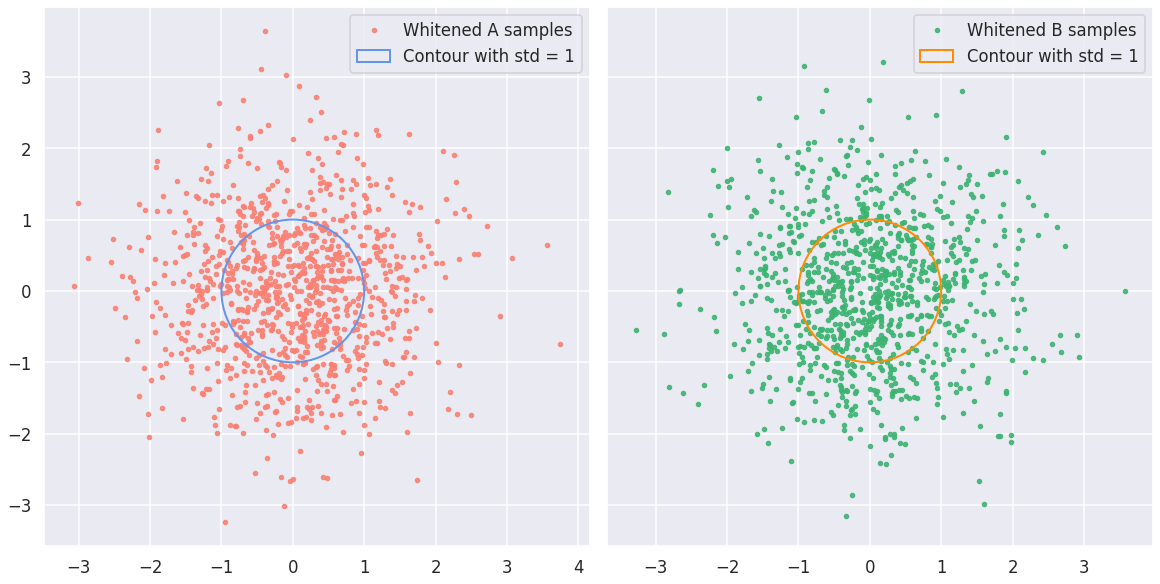

In [ ]:
std_val = 1 # Define the number of standard deviations for the countour
fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       constrained_layout = True, figsize = [16.0, 8.0],
                       subplot_kw = {'aspect': 'equal'})
A_whitened = matWhitening(A_matrix_samples)
ax[0].plot(A_whitened[0], A_whitened[1], '.', color = 'salmon', alpha = 0.9,
           label = "Whitened A samples")
ax[0].axis('equal')
from matplotlib.patches import Circle
circle = Circle((0, 0), std_val, edgecolor = 'cornflowerblue', facecolor = "none", 
                zorder = 5, ls = '-', lw = 2, label = "Contour with std = 1")
ax[0].add_patch(circle)
ax[0].legend()
# plt.show()

# fig, ax = plt.subplots(figsize = [12.0, 8.0], subplot_kw={'aspect': 'equal'})
# plt.plot(B_matrix_samples[:,0], B_matrix_samples[:,1], '.', alpha=0.7, label = "Unmodified samples")
B_whitened = matWhitening(B_matrix_samples)
ax[1].plot(B_whitened[0], B_whitened[1], '.', color= 'mediumseagreen', alpha = 0.9,
           label = "Whitened B samples")
ax[1].axis('equal')
from matplotlib.patches import Circle
circle = Circle((0, 0), std_val, edgecolor='darkorange', facecolor="none", 
                zorder = 5, ls = '-', lw = 2, label = "Contour with std = 1")
ax[1].add_patch(circle)
ax[1].legend()
plt.show()

## c)
For this question, the previously created obtainCovariance helper function can be used:

In [ ]:
obtainCovariance(A_matrix_samples)

array([[0.97480776, 0.00168268],
       [0.00168268, 0.95977765]])

Now for the B_matrix samples:

In [ ]:
obtainCovariance(B_matrix_samples)

array([[ 2.21598399, -2.20551649],
       [-2.20551649,  3.17428993]])

Comparing the matrices found in c) with the ones defined in a), it can be seen that although they are similar they are not exactly the same. The reason for their difference is due to the fact that the one found in c) is based on a sample of the whole population, while the one in a) is based on the entire population. They would indeed be equal if the sample would be the entire population.

What this all mean is that the more values we sample from the entire population for our statistical calculations, the more the information obtained from them will approach the real values of the population we are sampling from.

# Question 2

First, it is best to define the probabilities, means and covariances of each class.

In [ ]:
P1 = 0.2
mean1 = np.array([3, 2]).T
cov1 = [[1, -1], [-1, 2]]

P2 = 0.7
mean2 = np.array([5, 4]).T
cov2 = [[1, -1], [-1, 2]]

P3 = 0.1
mean3 = np.array([2, 5]).T
cov3 = [[0.5, 0.5], [0.5, 3]]

The obtainCovariance function will also be redefined, in case only some part of the code wants to be rerun

In [ ]:
# Based on https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/
def obtainCovariance(mat):
  ## Returns the covariance of an input matrix. The function expects a matrix
  ## in the form of features in the rows and samples in the columns
    mean = np.mean(mat, axis = 1) # Assume each row of the matrix is a feature
    sample_size = mat.shape[1] # Obtain the sample size
    mat = (mat.T - mean).T # Substract the mean from the matrix
    covariance_matrix = (mat @ mat.T) / (sample_size - 1) # Sample mean instead of real mean
    return covariance_matrix

## a)

For the first part of the question, a pair of  functions that allow for the calculation of the results will be built

In [ ]:
# Create the discriminant function
# Based on http://www.nada.kth.se/~stefanc/DATORSEENDE_AK/l5.pdf
def discriminant(val, meanMat, covMat, prob, ML = False):
  if ML == True:
    prob = 1/3
  val = np.array(val)
  inverse_covMat = np.linalg.inv(covMat)
  W_i = -0.5 * inverse_covMat
  w_i = inverse_covMat @ meanMat
  w_i_0 = -0.5 * meanMat.T @ inverse_covMat @ meanMat - 0.5 * np.log(np.linalg.det(covMat)) + np.log(prob)
  result = val.T @ W_i @ val + w_i.T @ val + w_i_0
  return result

# Create the prediction function
def predict(value1, value2, ML = False):
  discriminant1 = discriminant([value1, value2], mean1, cov1, P1, ML)
  discriminant2 = discriminant([value1, value2], mean2, cov2, P2, ML)
  discriminant3 = discriminant([value1, value2], mean3, cov3, P3, ML)

  if (discriminant1 >= discriminant2) and (discriminant1 >= discriminant3):
    classification = 1
  elif (discriminant2 >= discriminant1) and (discriminant2 >= discriminant3):
    classification = 2
  elif (discriminant3 >= discriminant2) and (discriminant3 >= discriminant1):
    classification = 3
  return classification

Afterwards, 

In [ ]:
# Based on https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Create the grid
x_min, x_max = -15, 15.01
y_min, y_max = -15, 15.01
# Select the step size for the mesh
h = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]

# Create the prediction for each coordinate in the grid
predictGridMAP = np.zeros((Z.shape[0], 1))
predictGridML = np.zeros((Z.shape[0], 1))
for i in range(Z.shape[0]):
  predictGridMAP[i] = predict(Z[i,0], Z[i,1])
  predictGridML[i] = predict(Z[i,0], Z[i,1], ML = True)

# Reshape it
predictGridMAP = predictGridMAP.reshape(xx.shape)
predictGridML = predictGridML.reshape(xx.shape)

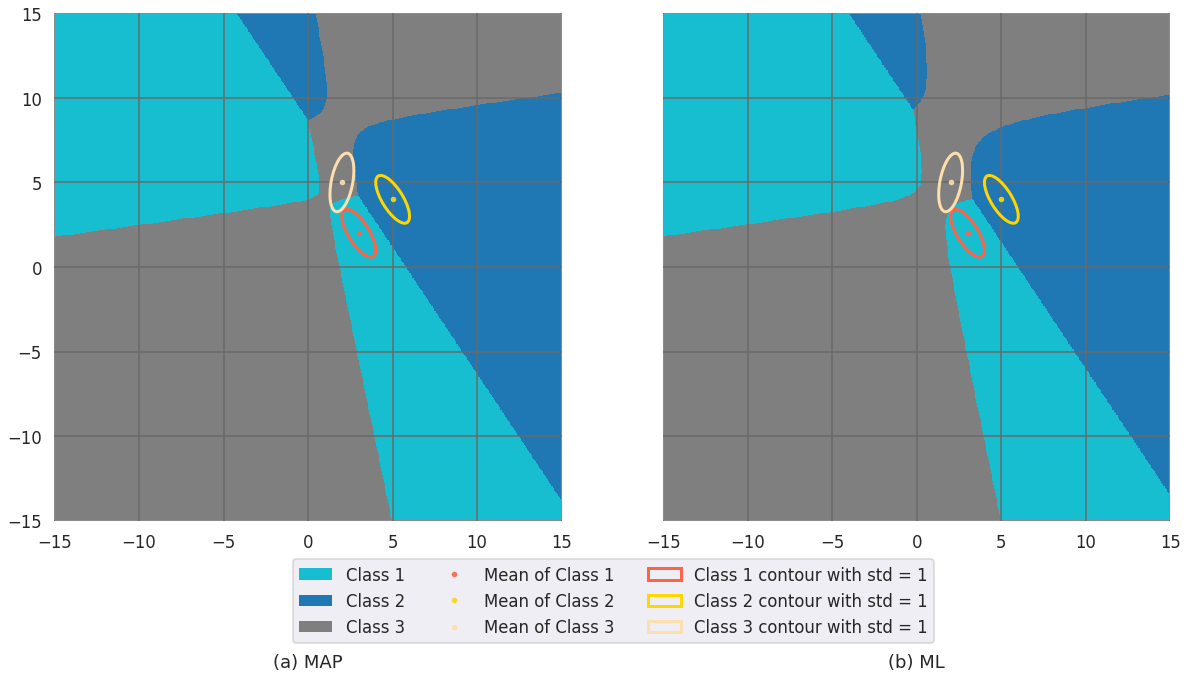

In [ ]:
# Import some elements needed for the plotting
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
# List of named colors in Matplotlib:
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# Create the color map
heatmap_colors = ["tab:cyan", "tab:blue", "tab:gray"]
# heatmap_colors = ["lightseagreen", "teal", "lightsteelblue"] # Alternative
mean_colors = ["tomato", "gold", "navajowhite"]
cmap_jm = ListedColormap(heatmap_colors)

# Plot the meshgrids
plt.rcParams["axes.axisbelow"] = False
fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       figsize = [20.0, 15.0], subplot_kw = {'aspect': 'equal'})
ax[0].pcolormesh(xx, yy, predictGridMAP, cmap = cmap_jm)

# Plot the means
ax[0].plot(mean1[0], mean1[1], '.', color = mean_colors[0],
           alpha = 0.9, label = "Mean of Class 1", zorder = 10)
ax[0].plot(mean2[0], mean2[1], '.', color = mean_colors[1],
           alpha = 0.9, label = "Mean of Class 2", zorder = 10)
ax[0].plot(mean3[0], mean3[1], '.', color = mean_colors[2],
           alpha = 0.9, label = "Mean of Class 3", zorder = 10)

# Plot the ellipses
ellipse1 = createEllipse(meanMat = mean1, covMat = cov1)
ax[0].add_patch(ellipse1)
ellipse1.set(clip_box = ax[0].bbox, edgecolor = mean_colors[0], lw = 3,
          label = "Class 1 contour with std = 1")
ellipse2 = createEllipse(meanMat = mean2, covMat = cov2)
ax[0].add_patch(ellipse2)
ellipse2.set(clip_box = ax[0].bbox, edgecolor = mean_colors[1], lw = 3,
          label = "Class 2 contour with std = 1")
ellipse3 = createEllipse(meanMat = mean3, covMat = cov3)
ax[0].add_patch(ellipse3)
ellipse3.set(clip_box = ax[0].bbox, edgecolor = mean_colors[2], lw = 3,
          label = "Class 3 contour with std = 1")

# Set the title
ax[0].set_title('(a) MAP', y = -0.3)

# Set the grid
ax[0].grid(True, color = 'dimgray')

# For the ML Plot
# Plot the mesh
ax[1].pcolormesh(xx, yy, predictGridML, cmap = cmap_jm)

#Plot the means
ax[1].plot(mean1[0], mean1[1], '.', color = mean_colors[0],
           alpha = 0.9, label = "Mean of Class 1", zorder = 10)
ax[1].plot(mean2[0], mean2[1], '.', color = mean_colors[1],
           alpha = 0.9, label = "Mean of Class 2", zorder = 10)
ax[1].plot(mean3[0], mean3[1], '.', color = mean_colors[2],
           alpha = 0.9, label = "Mean of Class 3", zorder = 10)

#Plot the ellipses
ellipse1 = createEllipse(meanMat = mean1, covMat = cov1,
                         edgecolor = mean_colors[0], lw = 3)
ax[1].add_patch(ellipse1)
ellipse2 = createEllipse(meanMat = mean2, covMat = cov2,
                         edgecolor = mean_colors[1], lw = 3)
ax[1].add_patch(ellipse2)
ellipse3 = createEllipse(meanMat = mean3, covMat = cov3,
                         edgecolor = mean_colors[2], lw = 3)
ax[1].add_patch(ellipse3)

# Define the legend elements
legendHandles, labels = ax[0].get_legend_handles_labels()
legendHandles.insert(0, Patch(facecolor = heatmap_colors[0], edgecolor = 'None',
                     label = "Class 1"))
legendHandles.insert(1, Patch(facecolor = heatmap_colors[1], edgecolor = 'None',
                     label = "Class 2"))
legendHandles.insert(2, Patch(facecolor = heatmap_colors[2], edgecolor = 'None',
                     label = "Class 3"))

# Set the legend
ax[1].legend(handles = legendHandles, ncol = 3,
             loc = 1, bbox_to_anchor = (0.55, -0.06))

ax[1].set_title('(b) ML', y = -0.3)
ax[1].grid(True, color = 'dimgray')
# fig.legend(handles = legendHandles, loc='lower center',
#            ncol = 3, mode = "expand")
plt.rcParams["axes.axisbelow"] = True
plt.show()

## b)

The same procedure used in question 1. a) can be used for this question, with the addition of a random number generator that will help randomize the number of samples each class gets based on the probability that they have of being from a class

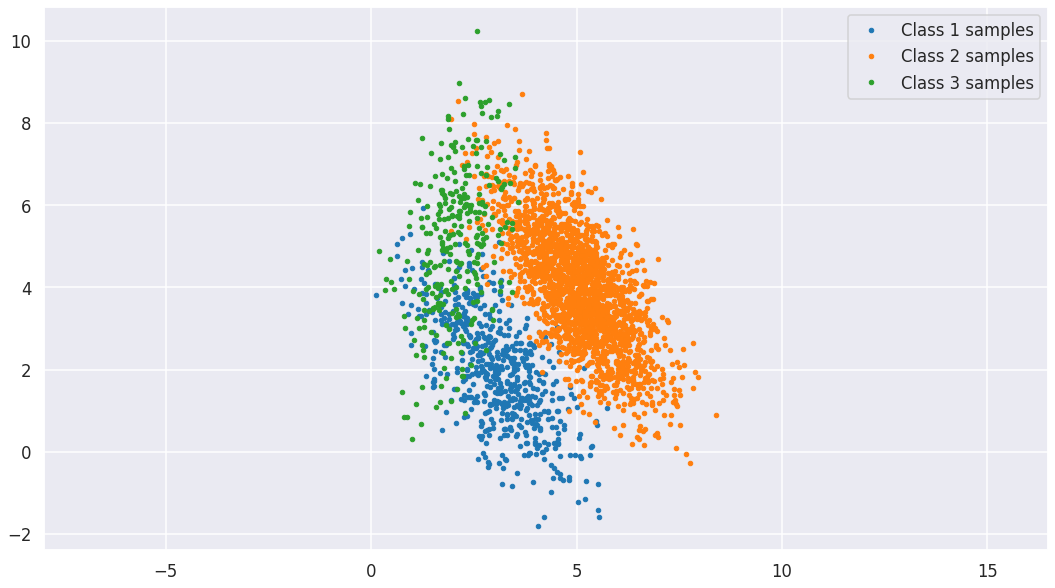

In [ ]:

sample_size = 3000

uncorr_datapoints = np.random.standard_normal((2, sample_size)).T
divider = np.random.uniform(size = 3000).T

totalSamples = np.c_[uncorr_datapoints, divider]
class1 = totalSamples[totalSamples[:, 2] <= 0.2][:,:-1]
class2 = totalSamples[totalSamples[:, 2] > 0.2]
class2 = class2[class2[:, 2] <= 0.9][:,:-1]
class3 = totalSamples[totalSamples[:, 2] > 0.9][:,:-1]

cholesky1 = np.linalg.cholesky(cov1)
cholesky2 = np.linalg.cholesky(cov2)
cholesky3 = np.linalg.cholesky(cov3)

class1 = cholesky1 @ class1.T + np.array(mean1).reshape(2,1)
class2 = cholesky2 @ class2.T + np.array(mean2).reshape(2,1)
class3 = cholesky3 @ class3.T + np.array(mean3).reshape(2,1)

fig, ax = plt.subplots(figsize = [18.0, 10.0], subplot_kw={'aspect': 'equal'})
ax.plot(class1[0], class1[1], '.', label = "Class 1 samples")
ax.plot(class2[0], class2[1], '.', label = "Class 2 samples")
ax.plot(class3[0], class3[1], '.', label = "Class 3 samples")
ax.axis('equal')
ax.legend()
plt.show()


Classifying the dataset using the previously defined prediction functions it is possible to obtain:

In [ ]:
# Let's make sure they are in the correct format
if class1.shape[0] == 2:
  class1 = class1.T
if class2.shape[0] == 2:
  class2 = class2.T
if class3.shape[0] == 2:
  class3 = class3.T

predictGridMAP_C1 = np.zeros((class1.shape[0], 1))
predictGridML_C1 = np.zeros((class1.shape[0], 1))

predictGridMAP_C2 = np.zeros((class2.shape[0], 1))
predictGridML_C2 = np.zeros((class2.shape[0], 1))

predictGridMAP_C3 = np.zeros((class3.shape[0], 1))
predictGridML_C3 = np.zeros((class3.shape[0], 1))

# Now to check the predictions of Class1
for i in range(class1.shape[0]):
  predictGridMAP_C1[i] = predict(class1[i, 0], class1[i, 1])
  predictGridML_C1[i] = predict(class1[i, 0], class1[i, 1], ML = True)

uniqueMAP, countsMAP = np.unique(predictGridMAP_C1, return_counts = True)
uniqueML, countsML = np.unique(predictGridML_C1, return_counts = True)

C1_MAP_classification = dict(zip(uniqueMAP, countsMAP))
C1_ML_classification = dict(zip(uniqueML, countsML))

# Now Class 2
for i in range(class2.shape[0]):
  predictGridMAP_C2[i] = predict(class2[i, 0], class2[i, 1])
  predictGridML_C2[i] = predict(class2[i, 0], class2[i, 1], ML = True)

uniqueMAP, countsMAP = np.unique(predictGridMAP_C2, return_counts = True)
uniqueML, countsML = np.unique(predictGridML_C2, return_counts = True)

C2_MAP_classification = dict(zip(uniqueMAP, countsMAP))
C2_ML_classification = dict(zip(uniqueML, countsML))

# Finally Class 3
for i in range(class3.shape[0]):
  predictGridMAP_C3[i] = predict(class3[i, 0], class3[i, 1])
  predictGridML_C3[i] = predict(class3[i, 0], class3[i, 1], ML = True)

uniqueMAP, countsMAP = np.unique(predictGridMAP_C3, return_counts = True)
uniqueML, countsML = np.unique(predictGridML_C3, return_counts = True)

C3_MAP_classification = dict(zip(uniqueMAP, countsMAP))
C3_ML_classification = dict(zip(uniqueML, countsML))

# Build confusion matrices
# confusionMatrix_MAP = np.zeros((3, 3))
confusionMatrix_MAP = np.c_[list(C1_MAP_classification.values()), list(C2_MAP_classification.values()), list(C3_MAP_classification.values())]
confusionMatrix_ML = np.c_[list(C1_ML_classification.values()), list(C2_ML_classification.values()), list(C3_ML_classification.values())]

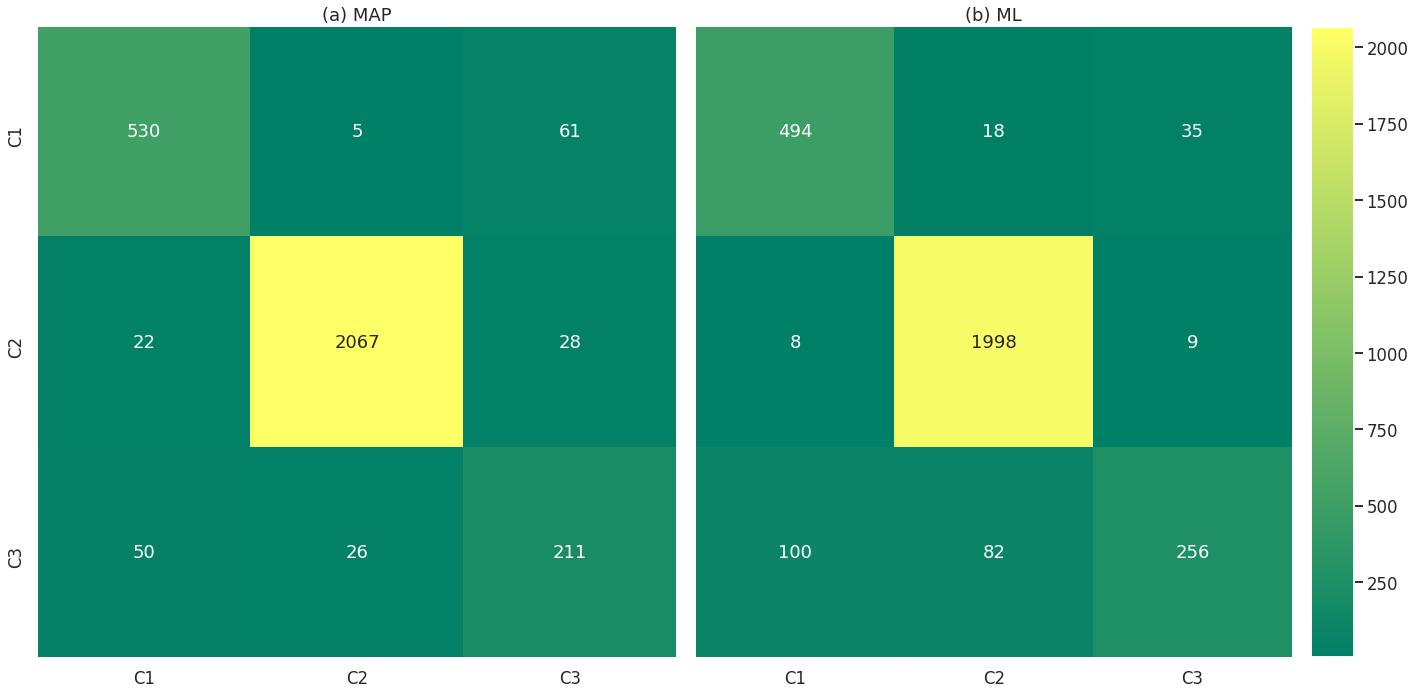

In [ ]:
df_CM_MAP = pd.DataFrame(confusionMatrix_MAP, index = ["C1", "C2", "C3"],
                  columns = ["C1", "C2", "C3"])
df_CM_ML = pd.DataFrame(confusionMatrix_ML, index = ["C1", "C2", "C3"],
                  columns = ["C1", "C2", "C3"])

vmin = min(df_CM_MAP.values.min(), df_CM_ML.values.min())
vmax = max(df_CM_MAP.values.max(), df_CM_ML.values.max())

# fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[4,1,0.2]))

# sns.heatmap(df, annot=True, cbar=False, ax=axs[0], vmin=vmin)
# sns.heatmap(df2, annot=True, yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)



fig, ax = plt.subplots(nrows = 1, ncols = 3,
                       figsize = [20.0, 10.0],
                       gridspec_kw = dict(width_ratios = [3, 2.8, 0.2]))
ax[0] = sns.heatmap(df_CM_MAP, vmin = vmin, vmax = vmax, annot = True, fmt = 'g', cbar = False, cmap = "summer", ax = ax[0])
ax[0].set_title('(a) MAP', y = 0)
ax[1].set_title('(b) ML', y = -10)
ax[1] = sns.heatmap(df_CM_ML, vmin = vmin, vmax = vmax, yticklabels=False, annot = True, fmt = 'g', cbar = False, cmap = "summer", ax = ax[1])
ax[2] = fig.colorbar(ax[0].collections[0], cax=ax[2])
fig.tight_layout()

# Question 3

## a)

For this question, the dataset needs to be loaded first, as well as reshaped to suit our needs

In [ ]:
# Based on https://stackoverflow.com/a/53570674
# To read file
import gzip
import urllib  # the lib that handles the url stuff
# f = gzip.open('train-images-idx3-ubyte.gz','r')

try:
  print("Getting training file locally")
  f = gzip.open('train-images-idx3-ubyte.gz','r')
except:
  print("Could not find it, getting file from the internet")
  mnist = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
  f = gzip.open(mnist,'r')
else:
  print("File found locally")

image_size = 28
num_images = 60000
feature_size = 784

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_img_form = data.reshape(num_images, image_size, image_size)
#reshape it into vector of num_images by 784 (1 number per row)
data_table_form = data.reshape(num_images, feature_size) 

Getting training file locally
Could not find it, getting file from the internet


No present the images in a more suiting manner, the following function will be applied to each ax of Matplotlib's figure.

In [ ]:
def disableTicks(ax):
  ax.tick_params(axis = 'both',      # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left = False,
    right = False,
    top = False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False,
    labelright = False,
    labeltop = False)
  ax.grid(False)

The images can now be displayed appropriately

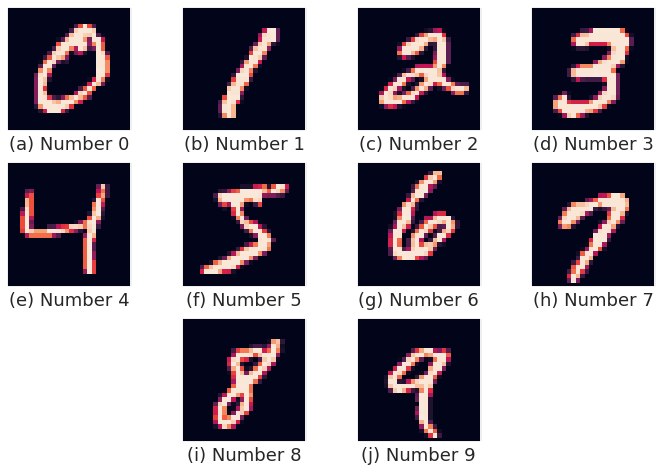

In [ ]:
from matplotlib.gridspec import GridSpec
imgNumbers = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
letters = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)", "(j)", ]

axs = []
fig = plt.figure(figsize = [12.0, 8.0])
gs = GridSpec(3, 4, hspace = 0.25, figure = fig)
axs.insert(0, fig.add_subplot(gs[0, 0]))
axs.insert(1, fig.add_subplot(gs[0, 1]))
axs.insert(2, fig.add_subplot(gs[0, 2]))
axs.insert(3, fig.add_subplot(gs[0, 3]))
axs.insert(4, fig.add_subplot(gs[1, 0]))
axs.insert(5, fig.add_subplot(gs[1, 1]))
axs.insert(6, fig.add_subplot(gs[1, 2]))
axs.insert(7, fig.add_subplot(gs[1, 3]))
axs.insert(8, fig.add_subplot(gs[2, 1]))
axs.insert(9, fig.add_subplot(gs[2, 2]))

for ax, imgNum, letter, num in zip(axs, imgNumbers, letters, range(len(imgNumbers))):
  # image = np.asarray(data_img_form[random.randint(0, 59999)])
  image = np.asarray(data_img_form[imgNum])
  ax.imshow(image)
  ax.set_title(letter + " Number " + str(num), y = -0.2)
  disableTicks(ax)

As can be seen in the picture, the MNIST dataset consists of 60,000 samples of handwritten numbers that range from 0 to 9. As they are all handwritten, they present discrepancies and differences between each time
Now, a function that calculates the Principal Component Analysis of the dataset will be built:

In [ ]:
# Based on https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
from sklearn.preprocessing import StandardScaler
def PCA(sampleMat, d):
  # Standardize the sample
  std_sampleMat = StandardScaler().fit_transform(sampleMat)
  # Get the covariance
  sampleMatCov = obtainCovariance(std_sampleMat.T)
# # eigendecomposition of covariance matrix
  eigenVals, eigenVecs = LA.eigh(sampleMatCov)
  eigenVecsPCA = eigenVecs[:,-d:]
  # Project the data to the number of desired features (d)
  modMat = eigenVecsPCA.T @ std_sampleMat.T
  return modMat, eigenVecsPCA

Testing it in the dataset projecting on the first two componentss of PCA:

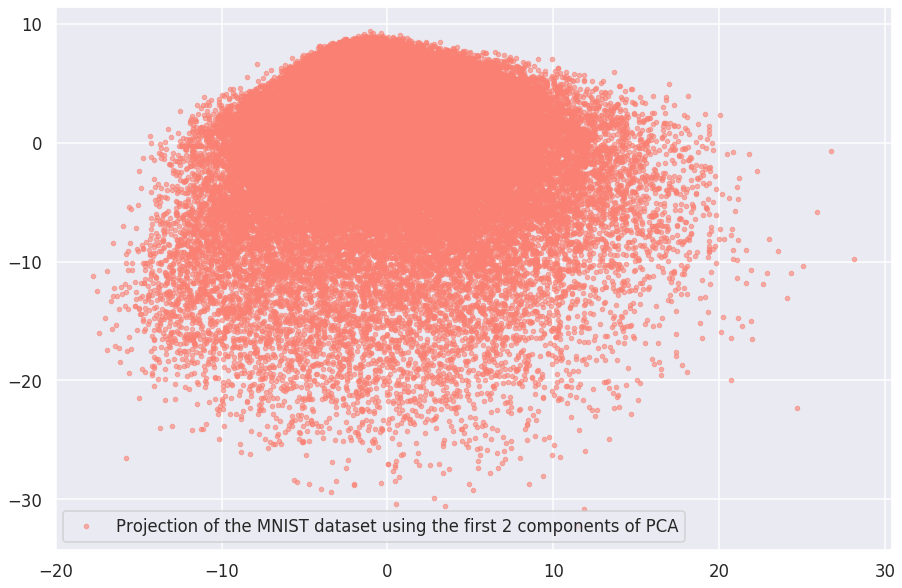

In [ ]:
matPCA, eigenVecsPCA = PCA(data_table_form, d = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = [15.0, 10.0])
ax.plot(matPCA[0, :], matPCA[1, :], ".", color = "salmon", alpha = 0.7, label = "Projection of the MNIST dataset using the first 2 components of PCA")
ax.legend()
plt.show()

## b)

For the second part of the third question, a suitable value for the number of dimensions is desired, in such a way that the dataset conserves at least 95% of the proportion of variance (POV).

In [ ]:
# First, import the required libraries
from sklearn.preprocessing import StandardScaler

# Standardize the data
std_data_table_form = StandardScaler().fit_transform(data_table_form)

# Get the covariance
mnistCov = obtainCovariance(std_data_table_form.T)

# Get the eigenvalues
eigenVals, eigenVecs = LA.eigh(mnistCov)

# Sort the eigenvalues
eigenVals = sorted(eigenVals, reverse=True)

# Calculate the total eigenvalue value
eigenvals_tot = sum(eigenVals)
explained_var = 0
featureNumber = -1
# Iterate over the cumulative sum of the eigenvalues until they
# explain at least 95% of the variance
while ((explained_var <= 95) and (featureNumber < 784)):
  featureNumber = featureNumber + 1
  var_exp = eigenVals[featureNumber] / eigenvals_tot * 100
  explained_var = explained_var + var_exp
  
print("The number of features required to conserve 95% of the POV is:", featureNumber + 1)

The number of features required to conserve 95% of the POV is: 330


From the total of 784 features, the first 331 are the ones needed to conserve a Proportion of Variance of 95%. This means that almost all the variance of the system can be represented using less than half than all the features (or modified pixels) of the dataset.

This can also be shown graphically, using the help of the following function:

In [ ]:
from matplotlib.ticker import MultipleLocator
def explainedVariance(eigenvals, maxEigen = 20, annotationPeriod = 10, desiredPOV = None):
  # The annotation period is how often the annotations should be marked
  # The desired POV is for creating an horizontal line at the desired Proportion of Variance (0 - 1)
  eigenvals_tot = sum(eigenvals) #Obtain the total of the eigenvalues
  var_exp = [(i / eigenvals_tot) * 100 for i in sorted(eigenvals, reverse=True)] #Obtain the 'variance each component explains' 
  cum_var_exp = np.cumsum(var_exp) #Obtain the cumulative variance

  x=['EV %s' %i for i in range(1, len(var_exp))] #Create the x ticks labels for the plot

  #-----------------------------------------------------
  #For ease of view, show only the first y eigenvalues:
  x = x[0:maxEigen]
  var_exp = var_exp[0:maxEigen]
  cum_var_exp = cum_var_exp[0:maxEigen]
  max_percentage = int(np.max(cum_var_exp)/10) #Calculate the max percentage to display (for the plot scaling)
  #-----------------------------------------------------

  y_pos = np.arange(len(x)) #Obtain the number of elements in the plots
  fig, ax = plt.subplots(figsize = (15,15))
  ax.bar(y_pos, var_exp, align = 'center', alpha = 0.5, label = "% of the components' total var") #Graph the bar chart
  ax.plot(y_pos, cum_var_exp, '-o', label='Cumulative explained var') #Plot the cumulative variance
  ax.legend(loc = 1, bbox_to_anchor = (0.85, -0.06), ncol = 2) #Plot the legend outside of the plot
  for i in range(len(x)):
    if i % annotationPeriod == 0:
        ax.annotate(round(cum_var_exp[i], 2), xy = (i, cum_var_exp[i] - 3)) #Annotate the (rounded) cumulative explained variance under each value
  for i in range(max_percentage):
      ax.axhline(y = 10 * (i + 1), alpha = 0.1, color = 'black') #Graph horizontal lines for easier viewing
  if desiredPOV is not None: # Add line at the desired Proportion of Variance
    ax.axhline(desiredPOV * 100, alpha = 0.2, color = 'red')
    ax.text(x = 10, y = desiredPOV * 100 + 0.2, s = "POV = {0:.0f}%".format(desiredPOV * 100), alpha = 0.7, color='#334f8d')
  # plt.xticks(y_pos, x, fontsize='large') #Plot the x ticks
  ax.xaxis.set_major_locator(MultipleLocator(annotationPeriod))
  # ax.yticks(fontsize = 'large')
  # plt.ylabel('Percentage of Explained Variance', fontsize = 'large') #Plot the y label
  # plt.xlabel('Number of Features', fontsize = 'large') #Plot the y label
  ax.set_ylabel('Percentage of Explained Variance')
  ax.set_xlabel('Number of Features')
  plt.title('Percentage of variance each component adds', fontsize = 'large') #Add a title to the graph
  plt.show() #Display the graph

2.0


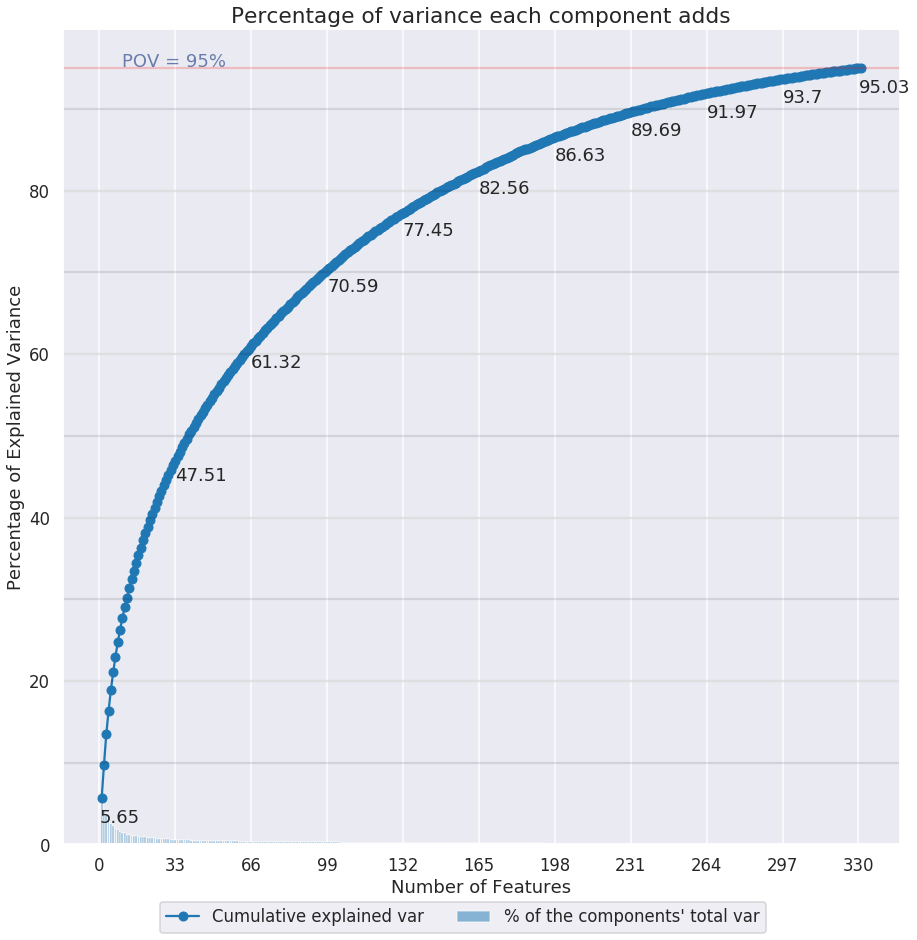

In [ ]:
explainedVariance(eigenVals, maxEigen = featureNumber + 1, annotationPeriod = round(featureNumber/10), desiredPOV = 0.95)

The figure shows the cumulative variance with respect to the number of features being used for the PCA. It can be seen that for achieving a percentage of variance of minimum 95% it is necessary to have at least 331 features.

## c)

In order to return to the original matrix, it is possible to use the eigenVectors array and apply it to the projected matrix, such that $\hat{\mathbf{x}} = ZV^T = XVV^T$. A funnction can be constructed to perform this operation, as such:

In [ ]:
# https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com
def unPCA(projMat, eigenVec):
  sampleMat = projMat.T @ eigenVec.T
  return sampleMat

def MSECalc(matrix, featureNum):
  matPCA, eigenVecsPCA = PCA(matrix, d = featureNum)
  matUnPCA = unPCA(matPCA, eigenVecsPCA)
  MSE = np.square(np.subtract(matrix, matUnPCA)).mean()
  return MSE

def standardize(matrix):
  mat = matrix - np.mean(matrix, axis = 0)

In [ ]:
features = [20 * i for i in range(1, 39)]
features.insert(0, 1)
features.append(784)
MSE = np.ones(len(features))

std_data_table_form = StandardScaler().fit_transform(data_table_form)

for val in features:
  i = round(val / 20)
  MSE[i] = MSECalc(std_data_table_form, val)

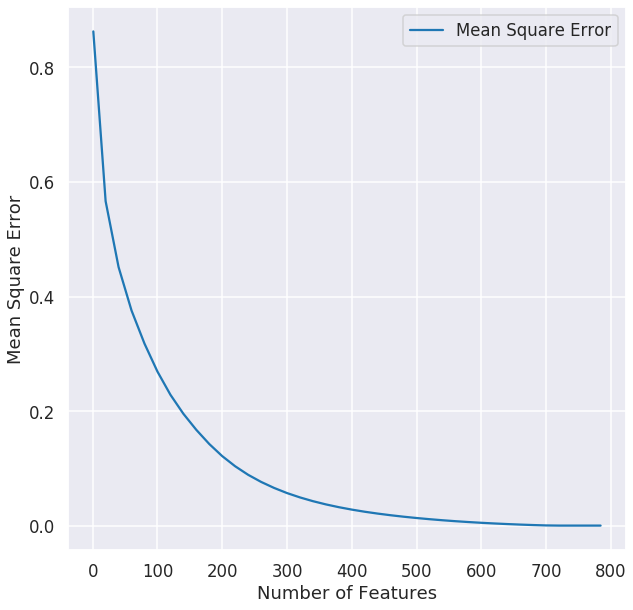

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(features, MSE, label = "Mean Square Error")
ax.set_ylabel('Mean Square Error')
ax.set_xlabel('Number of Features')
ax.legend()
plt.show()

## d)

Reconstruct a sample from the class of number ‘8’ and show it as a ‘png’ image for d=
{1, 10, 50, 250, 784}. Discuss the results

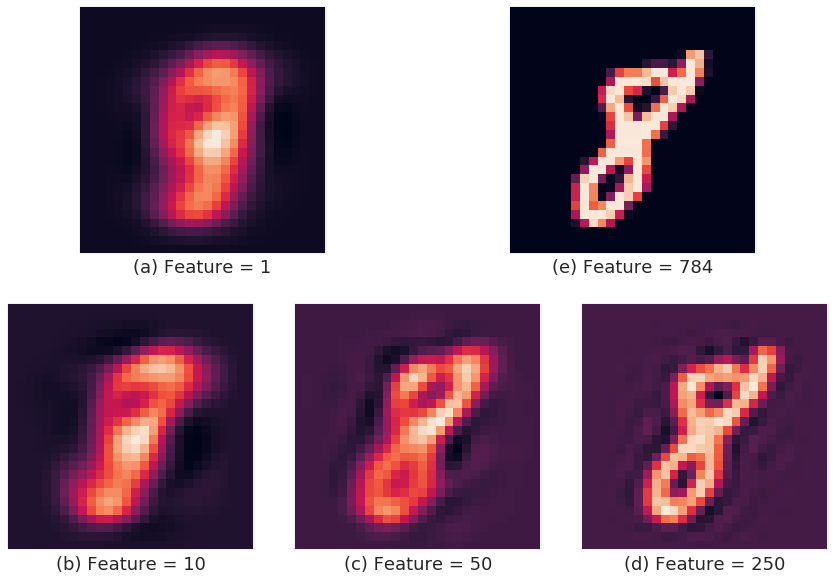

In [ ]:
from matplotlib.gridspec import GridSpec
d = [1, 10, 50, 250, 784]
scaler = StandardScaler()
std_data_table_form = scaler.fit_transform(data_table_form)

ax = []
fig = plt.figure(figsize = [15.0, 10.0])
gs = GridSpec(2, 6, hspace = 0.2, figure = fig)
ax.insert(0, fig.add_subplot(gs[0, :3]))
ax.insert(1, fig.add_subplot(gs[-1, 0:2]))
ax.insert(2, fig.add_subplot(gs[-1, 2:4]))
ax.insert(3, fig.add_subplot(gs[-1, 4:6]))
 # Make the last one be besides the first, for better comparison of results
ax.insert(4, fig.add_subplot(gs[0, 3:]))

#Add titles
for feat, letter, num in zip(d, ["(a)", "(b)", "(c)", "(d)", "(e)"], range(5)):
  matPCA, eigenVecsPCA = PCA(std_data_table_form, d = feat)
  matUnPCA = unPCA(matPCA, eigenVecsPCA)
  matUnPCA = scaler.inverse_transform(matUnPCA)
  matImg = matUnPCA.reshape(num_images, image_size, image_size)
  ax[num].set_title(letter + " Feature = " + str(feat), y = -0.1)
  image = np.asarray(matImg[17])
  ax[num].imshow(image)
  disableTicks(ax[num])
plt.show()

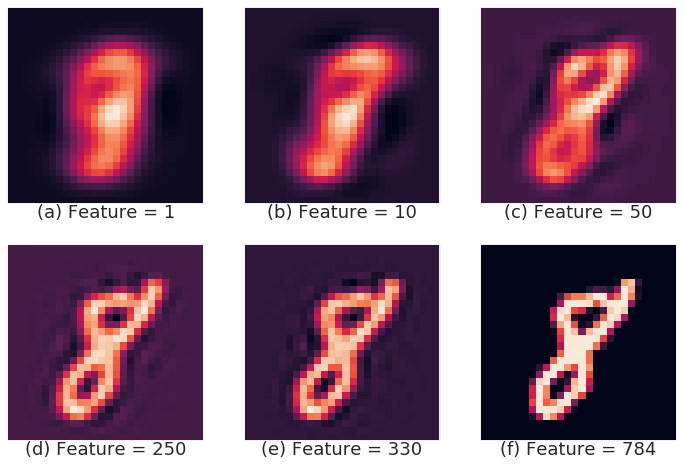

In [ ]:
from matplotlib.gridspec import GridSpec
d= [1, 10, 50, 250, featureNumber, 784]
scaler = StandardScaler()
std_data_table_form = scaler.fit_transform(data_table_form)

ax = []
fig = plt.figure(figsize = [12.0, 8.0])
gs = GridSpec(2, 3, hspace = 0.2, figure = fig)
ax.insert(0, fig.add_subplot(gs[0, 0]))
ax.insert(1, fig.add_subplot(gs[0, 1]))
ax.insert(2, fig.add_subplot(gs[0, 2]))
ax.insert(3, fig.add_subplot(gs[1, 0]))
ax.insert(4, fig.add_subplot(gs[1, 1]))
ax.insert(5, fig.add_subplot(gs[1, 2]))

#Add titles
for feat, letter, num in zip(d, ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"], range(6)):
  matPCA, eigenVecsPCA = PCA(std_data_table_form, d = feat)
  matUnPCA = unPCA(matPCA, eigenVecsPCA)
  matUnPCA = scaler.inverse_transform(matUnPCA) # We also need to scale it back to make it more presentable
  matImg = matUnPCA.reshape(num_images, image_size, image_size)
  ax[num].set_title(letter + " Feature = " + str(feat), y = -0.1)
  image = np.asarray(matImg[17])
  ax[num].imshow(image)
  disableTicks(ax[num])
plt.show()

It can be seen that with the mroe features that are being used, the better results it will be possible to obtain. Using one feature (a),the definition of the image is poor and thus it is not possible to distuinguish if it is a three or an eight that is being shown. Using 10 features is still difficult to distuinguish, and by 50 features it is somewhat possible to distinguish what number is being shown, but it is still a bit difficult. From 250 onwards it is easier to distuinguish the number albeit with a bit of difficulty in the edges of the number. At 784, the original number of features, the number is easy to distuinguish compared with the rest shown in the previous figure (with the numbers form 0 to 9).

# Question 4

## a)

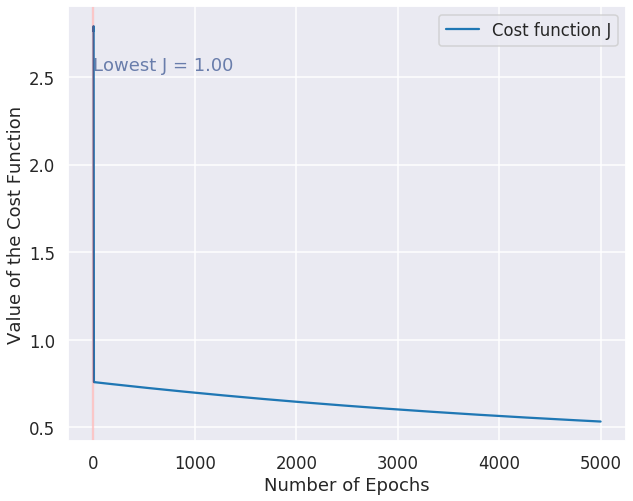

In [ ]:
from scipy.special import expit as expit
from sklearn.preprocessing import MinMaxScaler
import random

dataset = pd.read_csv('dataset3.txt', header=None)
dataset.columns = ["x", "y", "class"]
dataset


datasetNP = dataset.values
# datasetNP = MinMaxScaler().fit_transform(datasetNP)

epochs = 5000
J = 0
dw1 = 0.5
dw2 = 0.5
db = 0.5
learnRate = 0.0001
s = 0.001
lowestJ = 1000000

J_Epoch = np.zeros(epochs)
lowestJ = np.ones(5)

coeffs = np.ones(3) #b, w1, w2

for k in range(epochs):
  # if k % 1000 == 0:
    # learnRate = learnRate/10 # Reduce the learn rate depending on the number of epochs
  for i in range(dataset.shape[0]):
    z = coeffs[1:3].T @ datasetNP[i, 0:2] + coeffs[0]
    a = expit(z)
    y = datasetNP[i, 2]
    J = J - (y * np.log(a + s) + (1 - y) * np.log(1 - a + s))
    if lowestJ[0] > J:
      lowestJ[0] = J
      lowestJ[1] = k
      lowestJ[2] = coeffs[0]
      lowestJ[3] = coeffs[1]
      lowestJ[4] = coeffs[2]
    dz = a - y
    dw1 = datasetNP[i, 0] * dz
    dw2 = datasetNP[i, 1] * dz
    db = dz
    coeffs[1] = coeffs[1] - learnRate * dw1
    coeffs[2] = coeffs[2] - learnRate * dw2
    coeffs[0] = coeffs[0] - learnRate * db
  J = J/dataset.shape[0]
  J_Epoch[k] = J

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(J_Epoch, label = "Cost function J")
ax.axvline(lowestJ[1], alpha = 0.2, color = 'red')
ax.text(x = lowestJ[1] + 0.2, y = max(J_Epoch)/1.1, s = "Lowest J = {0:.2f}".format(lowestJ[0]), alpha = 0.7, color='#334f8d')
ax.set_ylabel('Value of the Cost Function')
ax.set_xlabel('Number of Epochs')
ax.legend()
plt.show()

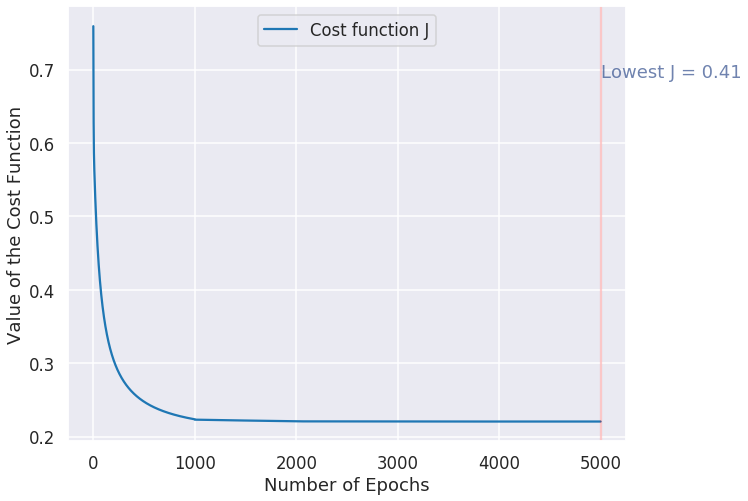

In [ ]:
# With minmax scaler
from scipy.special import expit as expit
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('dataset3.txt', header=None)
dataset.columns = ["x", "y", "class"]
dataset


datasetNP = dataset.values
datasetNP
datasetNP = MinMaxScaler().fit_transform(datasetNP)

epochs = 5000
J = 0
dw1 = 0.5
dw2 = 0.5
db = 0.5
learnRate = 0.1
s = 0.0000001
lowestJ = 1000000

J_Epoch = np.zeros(epochs)
lowestJ = np.ones(5)

coeffs = np.ones(3) #b, w1, w2

for k in range(epochs):
  if k % 1000 == 0:
    learnRate = learnRate/10 # Reduce the learn rate depending on the number of epochs
  for i in range(dataset.shape[0]):
    z = coeffs[1:3].T @ datasetNP[i, 0:2] + coeffs[0]
    a = expit(z)
    y = datasetNP[i, 2]
    J = J - (y * np.log(a + s) + (1 - y) * np.log(1 - a + s))
    if lowestJ[0] > J:
      lowestJ[0] = J
      lowestJ[1] = k
      lowestJ[2] = coeffs[0]
      lowestJ[3] = coeffs[1]
      lowestJ[4] = coeffs[2]
    dz = a - y
    dw1 = datasetNP[i, 0] * dz
    dw2 = datasetNP[i, 1] * dz
    db = dz
    coeffs[1] = coeffs[1] - learnRate * dw1
    coeffs[2] = coeffs[2] - learnRate * dw2
    coeffs[0] = coeffs[0] - learnRate * db
  J = J/dataset.shape[0]
  J_Epoch[k] = J

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(J_Epoch, label = "Cost function J")
ax.axvline(lowestJ[1], alpha = 0.2, color = 'red')
ax.text(x = lowestJ[1] + 0.2, y = max(J_Epoch)/1.1, s = "Lowest J = {0:.2f}".format(lowestJ[0]), alpha = 0.7, color='#334f8d')
ax.set_ylabel('Value of the Cost Function')
ax.set_xlabel('Number of Epochs')
ax.legend()
plt.show()